In [24]:
class LiftFinder():
    b = 0
    PI = 3.1415926536
    v_infinity = 0
    rho = 0
    c(x) = 0
    alphaL0(x) = 0
    alpha(x) = 0
    N = 0
    x_axis_reference = []
    lift_vector = []
    total_lift = 0
    
    def __init__(self,wing_info):
        self.b = wing_info[0]
        self.v_infinity = wing_info[1]
        self.rho = wing_info[2]
        self.c = SR(wing_info[3].replace("pi", str(self.PI)))
        self.alphaL0 = SR(wing_info[4].replace("pi", str(self.PI)))
        self.alpha = SR(wing_info[5].replace("pi", str(self.PI)))
        self.N = int(wing_info[6])
        LiftFinder.get_lift(self)
        


    def five_fifty_one(self):
        x = var("x")
        N = self.N
        alpha = self.alpha
        alphaL0 = self.alphaL0
        pi = self.PI
        b = self.b
        c = self.c
        rhs_vector = [0 for i in range(N)]
        eqParts = [[0 for i in range(N)] for i in range(N)]
        #The last column is the RHS, alpha(theta) - alphaL0(theta)
        for row in range(0, N):
            theta = pi * (row + 1)/(N+1) # This gets N non-zero thetas evenly distributed, using pi * row / N would have zero as the first value
            rhs_vector[row] = [alpha(x=theta) - alphaL0(x=theta)] # assign last column
            
            for col in range(0, N):
                n = col + 1
                eqParts[row][col] = (2 * b * sin(n * theta)) / (pi * c(x=theta)) + (n * sin(n * theta)) / sin(theta)

        an_vector = matrix(eqParts).solve_right(matrix(rhs_vector))
        return an_vector


    def gamma(self):
        pi = self.PI
        N = self.N
        alpha = self.alpha
        b = self.b
        v_infinity = self.v_infinity
        
        an_vector = LiftFinder.five_fifty_one(self)
        gamma_per_theta = [0 for i in range(0, N)]
        for theta_lcv in range(0, N):
            sum = 0
            theta = pi * (theta_lcv + 1) / (N + 1)
            for i in range(0, N): #i is the loop control variable, n is what we're using in the actual sum
                n = i + 1
                sum = sum + an_vector[i] * sin(n * theta)
            gamma_per_theta[theta_lcv] = sum * 2 * b * v_infinity
        return gamma_per_theta


    def lift_finder(self):
        gamma_per_theta = LiftFinder.gamma(self)
        rho = self.rho
        v_infinity = self.v_infinity
        lift_vector = []
        for value in gamma_per_theta:
            lift_vector.append(rho * v_infinity * abs(value))
        self.lift_vector = LiftFinder.full_lift_vector(self, lift_vector)
        self.x_axis_reference = LiftFinder.generate_x_axis(self)


    def get_lift(self):
        LiftFinder.lift_finder(self)
        N = self.N
        full_lift_vector = self.lift_vector
        x_axis_reference = self.x_axis_reference
        
        
        total = 0
        for index in range(N + 1):
            delta_x = abs(x_axis_reference[index] - x_axis_reference[index + 1])
            avg = (full_lift_vector[index] + full_lift_vector[index + 1]) / 2
            total = total + delta_x * avg
        self.total_lift = total
        return total

    
    def get_zipped_lists(self):
       return list(zip(self.x_axis_reference, self.lift_vector))
   

    def get_x_axis_reference(self):
        return self.x_axis_reference
    def get_lift_vector(self):
        return self.lift_vector
    def get_total_lift(self):
        return self.total_lift
    
    # Some helper methods
    def generate_x_axis(self):
        pi = self.PI
        N = self.N
        b = self.b
        
        x_axis_reference = [- b / 2]
        for n in range(0, N):
            theta = pi * (n + 1)/(N+1)
            x_axis_reference.append(-b/2*(cos(theta)))

        x_axis_reference.append(b/2)
        return x_axis_reference
    

    def full_lift_vector(self, lift_vector):
    #testing
        lift_per_y = [0]

        for value in lift_vector:
            lift_per_y.append(value)
        lift_per_y.append(0)
        
        return lift_per_y


Total lift for wing 0 = 20021.8284407485
Total lift for wing 1 = 20286.7873988809


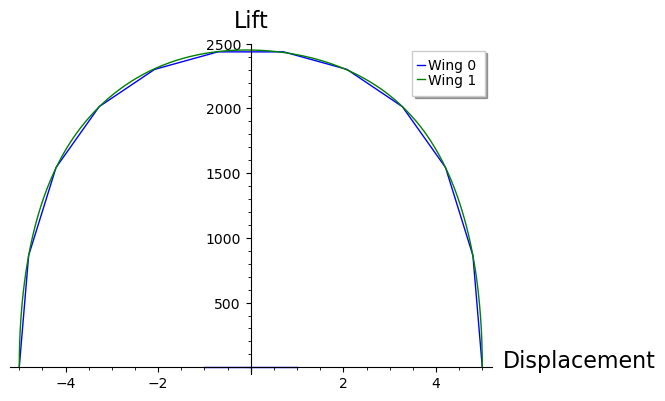

In [27]:
#wing_info format:
#[b, v_infinity, rho, "c(x)", "alphaL0(x)", "alpha(x)", N]

wings = [[10, 50, 1.225, "5", "0", "5 * pi/180", 10],
         [10, 50, 1.225, "5", "0", "5 * pi/180", 100]
         ]
color_list = ["blue", 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
totalplots = plot(0)
index = 0
for wing_info in wings:    
    vec = LiftFinder(wing_info)
    totalplots = totalplots + list_plot(vec.get_zipped_lists(), legend_label=("Wing " + str(index)), color=color_list[index % 7], plotjoined = True)
    print("Total lift for wing " + str(index) + " = " + str(vec.get_total_lift()))
    index = index + 1
    
totalplots.axes_labels(["Displacement", "Lift"])
totalplots.show()
#vec.lift_finder()
# x_ax = vec.get_x_axis_reference
# y_ax = vec.get_lift_vector
#list_plot(list(zip(x_ax, y_ax)), axes_labels = ["Displacement", "Lift"] )